/Users/junyulyu/Library/Caches/pypoetry/virtualenvs/mine-seg-sat-14bnJD6w-py3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


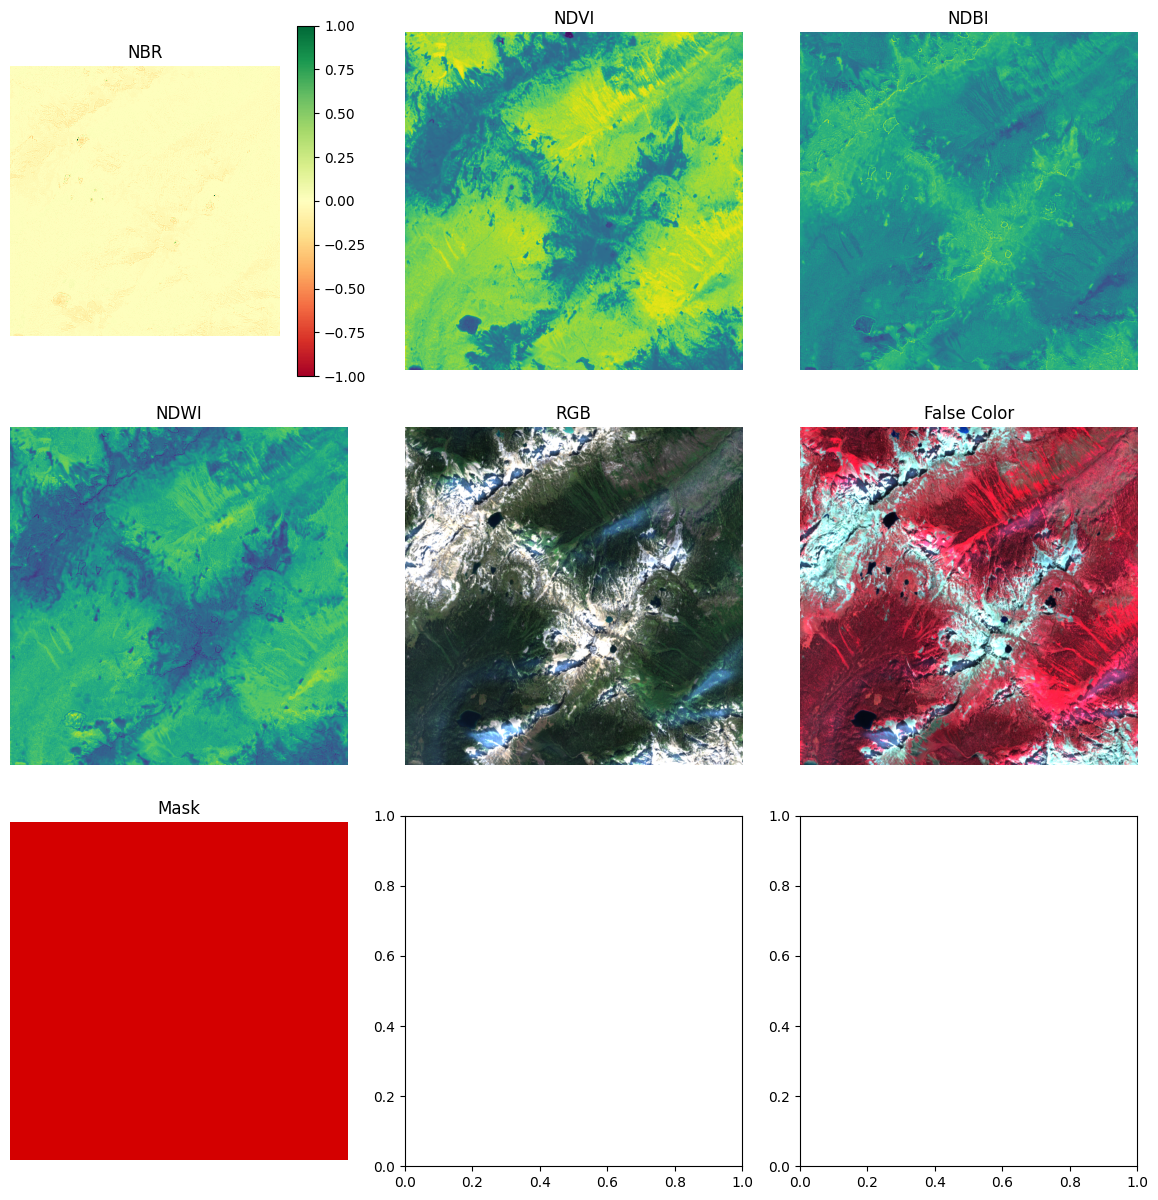

In [1]:
import dataset  # Assuming the provided code is saved in a file named 'dataset.py'
from pathlib import Path

# Define the path to your data and the split you want to use (e.g., 'train')
data_path = Path("/Users/junyulyu/Desktop/Capstone/prepare_dataset")
split = "train"  # or 'val' or 'test', depending on your dataset_splits.csv

# Instantiate the dataset
forest_sat_dataset = dataset.MineSATDataset(split=split, data_path=data_path)

# Choose an index of an image you want to visualize
index = 3  # You can change this to any valid index

# Display the transformed images including NBR and NDVI
forest_sat_dataset.display_transformed_images(index)


In [4]:

import numpy as np
import csv

def save_numerical_values_to_csv(numerical_values, csv_filename):
    # Flatten the numerical values and prepare them for writing to a CSV file
    flattened_data = {}
    for key, value in numerical_values.items():
        if isinstance(value, np.ndarray):
            flattened_data[key] = value.flatten()
        else:
            flattened_data[key] = value

    # Find the longest array in the flattened data
    max_length = max(len(v) for v in flattened_data.values())

    # Ensure all arrays are the same length, filling with NaN where necessary
    for key in flattened_data:
        length = len(flattened_data[key])
        if length < max_length:
            flattened_data[key] = np.pad(flattened_data[key], (0, max_length - length), constant_values=np.nan)

    # Write to CSV
    with open(csv_filename, 'w', newline='') as csvfile:
        fieldnames = list(flattened_data.keys())
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

        writer.writeheader()
        for i in range(max_length):
            row = {key: flattened_data[key][i] for key in fieldnames}
            writer.writerow(row)


In [5]:
numerical_values = forest_sat_dataset.get_numerical_values(index)
print(numerical_values)
save_numerical_values_to_csv(numerical_values, "output.csv")


{'NBR': array([[-0.00999596,  0.02662181,  0.04007396, ..., -0.0911816 ,
        -0.06883312, -0.05942107],
       [ 0.0027223 , -0.01814309,  0.03997078, ...,  0.04651648,
        -0.0222691 , -0.0568887 ],
       [-0.00543984, -0.06026123,  0.0314502 , ...,  0.06385636,
         0.03445345,  0.05491591],
       ...,
       [-0.07972308, -0.07209218, -0.12101249, ..., -0.04328385,
        -0.04430327, -0.04014751],
       [-0.02045219, -0.15383753, -0.09249559, ..., -0.02296779,
        -0.04753572, -0.08123782],
       [ 0.1204129 , -0.04572663,  0.00339026, ..., -0.0030134 ,
        -0.04948999, -0.06038488]]), 'NDVI': array([[ 0.52280546,  0.54146799,  0.56777388, ...,  0.25969161,
         0.19329349,  0.15863454],
       [ 0.40577101,  0.33886735,  0.54176503, ...,  0.35672499,
         0.30095533,  0.29810847],
       [ 0.13220246,  0.05991849,  0.41500192, ...,  0.43673511,
         0.34554592,  0.41334943],
       ...,
       [ 0.50521289,  0.57061212,  0.53970095, ..., -0.166